# Random Forest for Wine Quality

## Objective
Employ a random forest to identify important features in predicting wine quality.

## Steps
1. Load dataset.
2. Understand Information.
3. Data Preprocessing.
4. Create Random Forest Model.
5. Analyze Feature Importance
6. Discussion

## Setup Environment

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load Dataset

We begin by loading the wine quality dataset.

In [2]:
csv_file = 'WineQT.csv'

data = pd.read_csv(csv_file)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## 2. Understand Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## 3. Data Preprocessing

We will handle any missing values, encode categorical variables, and normalize numerical features.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Create Random Forest Model
We will use a random forest to predict wine quality and analyze feature importance..

In [5]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf

RandomForestClassifier()

### Prediction

In [7]:
pred = rf.predict(X_test)
pred

array([5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 7, 6, 6, 5, 5, 5, 6, 5, 7, 6, 5,
       5, 7, 5, 5, 7, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 6, 7, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       7, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 7, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6,
       7, 6, 5, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 7, 5,
       6, 6, 5, 5, 5, 6, 6, 6, 6], dtype=int64)

### Accuracy

In [8]:
accuracy = metrics.accuracy_score(y_test, pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.6899563318777293


## 5. Analyze Feature Importance
We will analyze and rank the importance of different features in the dataset.r.

In [12]:
feature_importances = rf.feature_importances_
features = X.columns

df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
df = df.sort_values(by ='Importance', ascending = False)
df

,Feature,Importance
10,alcohol,0.131058
9,sulphates,0.109734
1,volatile acidity,0.101923
6,total sulfur dioxide,0.091264
7,density,0.081149
11,Id,0.078940
4,chlorides,0.073438
0,fixed acidity,0.072390
8,pH,0.068813
2,citric acid,0.067160


## 6. Plot Feature Importance 

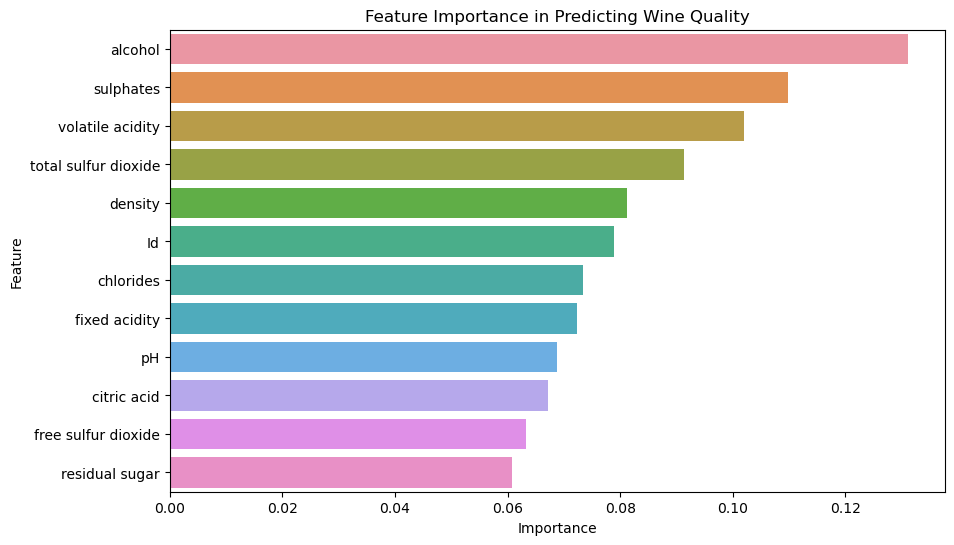

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = df)
plt.title('Feature Importance in Predicting Wine Quality')
plt.show()

## 5. Discussion

We analyze the model's accuracy and discuss potential improvements and biases.

### Model Accuracy

- The accuracy score shows the proportion of correct predictions.

### Feature Importance

- The bar plot visualizes the importance of each feature in predicting wine quality.

### Potential Improvements

- Use more advanced techniques.